## Predict the number row

In [1]:
import numpy as np
np.random.seed(1)

IN_DIM = 3
OUT_DIM = 1

ALPHA = 0.01
NUM_EPOCHS = 300


dataset = [(np.array([2.92, 3.56, 0.15]), 5.11),
           (np.array([3.56, 0.15, 5.11]), 1.38),
           (np.array([0.15, 5.11, 1.38]), 4.44),
           (np.array([5.11, 1.38, 4.44]), 1.61),
           (np.array([1.38, 4.44, 1.61]), 4.11),
           (np.array([4.44, 1.61, 4.11]), 1.97),
           (np.array([1.61, 4.11, 1.97]), 4.50),
           (np.array([4.11, 1.97, 4.50]), 1.37),
           (np.array([1.97, 4.50, 1.37]), 5.08),
           (np.array([4.50, 1.37, 5.08]), 1.76)]

# weights
# W = np.random.randn(IN_DIM)
W = np.array([0.5, 1.2, 0.7])


In [2]:
# used to predict probability. resulting [0, 1]
def sigmoid(s):
    return 1 / (1 + np.exp(-s))


def sigmoid_deriv(s):
    return s * (1 - s)


def predict(x):
    s = x @ W
    y = sigmoid(s)
    return y


# learning

loss = []

for e in range(NUM_EPOCHS):
    for i in range(len(dataset)):
        x, result = dataset[i]
        
        # forward
        s = x @ W
        y = sigmoid(s) * 10
        
        # mean squared error
        E = np.square(y - result)  
        
        # backward - using the derevative (gradient) to know the direction to go to reduce the error
        ds = (y - result) * sigmoid_deriv(y / 10)
        dW = x * ds
        
        # print('x:', x)
        # print(' W', W)
        # print('  s', s)
        # print('  ->y', y)
        # print('  ds', ds)
        # print(' dW', dW)
        # print('error: ', E)

        # update
        W -= ALPHA * dW

        loss.append(E)


In [3]:
# [2.92, 3.56, 0.15, 5.11, 1.38, 4.44, 1.61, 4.11, 1.97, 4.50, 1.37, 5.08, 1.76, 5.19, 1.58]
# x = np.array([1.37, 5.08, 1.76])
# x = np.array([2.92, 3.56, 0.15])
x = np.array([5.08, 1.76, 5.19])

probs = predict(x)
print('Predicted: ', probs * 10)

W

Predicted:  1.474160205253321


array([-0.03310379,  0.08336957, -0.33402239])

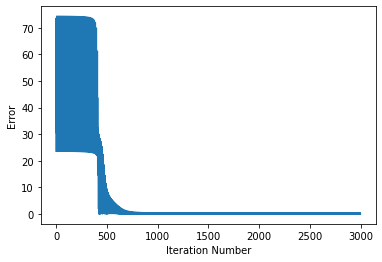

In [4]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()
